# **Heart Disease Analysis: Understanding Key Risk Indicators**

## **Problem Statement:**
Heart disease is one of the leading causes of death worldwide. Identifying risk factors
and understanding their impact can help develop strategies for early detection and
prevention. This project aims to analyze a dataset of heart disease patients to explore
patterns and correlations among key health indicators, such as cholesterol levels, blood
pressure, and age, to determine their relationship with heart disease.

## Dataset:
- https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

This dataset contains 303 records with 14 attributes, including patient demographics,
medical test results, and a target variable indicating the presence of heart disease.

---

## **EDA Questions:**
> # 1. General Information

### **Finding Number of Rows and Columns in Dataset**

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading Dataset
df=pd.read_csv('/content/heart_disease_uci.csv')

In [4]:
# Number Of Rows and Columns in Dataset
shape_of_df=df.shape
shape_of_df

(920, 16)

In [5]:
print("Total Number Of Rows in DataSet:",shape_of_df[0])

Total Number Of Rows in DataSet: 920


In [6]:
print("Total Number Of Columns in DataSet:",shape_of_df[1])

Total Number Of Columns in DataSet: 16


---
### **Finding Missing Values in Dataset**

In [10]:
missing_values=df.isnull().sum().sum()
print("Total Number Of missing values in Dataset:",missing_values)

Total Number Of missing values in Dataset: 1759


In [7]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


---
# 2. Target Variable Analysis

In [48]:
# Distribution of the target variable (presence of heart disease: 0 or 1)
target_distribution = df['num'].value_counts()
target_distribution

,count
num,
0,411
1,265
2,109
3,107
4,28


In [ ]:
# Counting the number of patients with and without heart disease

---

# 3. Demographic Insights

In [19]:
# Age Range
minimun_age=df['age'].min()
maximun_age=df['age'].max()
print("Minimum Age in DataSet:",minimun_age)
print("Maximun Age in DataSet:",maximun_age)

Minimum Age in DataSet: 28
Maximun Age in DataSet: 77


In [22]:
# Gender Distribution Of Patients
gender_distribution=df['sex'].value_counts()
gender_distribution

,count
sex,
Male,726
Female,194


In [23]:
print("Total Number Of Male Patients:",gender_distribution[0])
print("Total Number Of Female Patients:",gender_distribution[1])

Total Number Of Male Patients: 726
Total Number Of Female Patients: 194


<ipython-input-23-92efe3c6c92c>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Total Number Of Male Patients:",gender_distribution[0])
<ipython-input-23-92efe3c6c92c>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Total Number Of Female Patients:",gender_distribution[1])


---
# 4. Health Metrics

In [24]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Average Values

In [28]:
print("Average value of Resting Blood Pressure",df['trestbps'].mean())
print("Average value of Serum Cholesterol",df['chol'].mean())
print("Average value of Maximum heart rate",df['thalch'].mean())

Average value of Resting Blood Pressure 132.13240418118468
Average value of Serum Cholesterol 199.13033707865168
Average value of Maximum heart rate 137.5456647398844


### Median Values

In [30]:
print("Median value of Resting Blood Pressure",df['trestbps'].median())
print("Median value of Serum Cholesterol",df['chol'].median())
print("Median value of Maximum heart rate",df['thalch'].median())

Median value of Resting Blood Pressure 130.0
Median value of Serum Cholesterol 223.0
Median value of Maximum heart rate 140.0


---

# 5. Categorical Features

In [41]:
# How many patients have exercise-induced angina (exang)?
exang_counts = df['exang'].value_counts()
exang_counts

,count
exang,
False,528
True,337


In [37]:
# Counts of different chest pain types (cp)
chest_pain_counts = df['cp'].value_counts()
chest_pain_counts

,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


In [40]:
print("Number of patients with asymptomatic chest pain:", chest_pain_counts[0])
print("Number of patients with non-anginal pain:", chest_pain_counts[1])
print("Number of patients with atypical angina:", chest_pain_counts[2])
print("Number of patients with typical angina:", chest_pain_counts[3])

Number of patients with asymptomatic chest pain: 496
Number of patients with non-anginal pain: 204
Number of patients with atypical angina: 174
Number of patients with typical angina: 46


<ipython-input-40-1c2210044bf0>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Number of patients with asymptomatic chest pain:", chest_pain_counts[0])
<ipython-input-40-1c2210044bf0>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Number of patients with non-anginal pain:", chest_pain_counts[1])
<ipython-input-40-1c2210044bf0>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Number of patients with atypical 

# 6. Visual Analysis

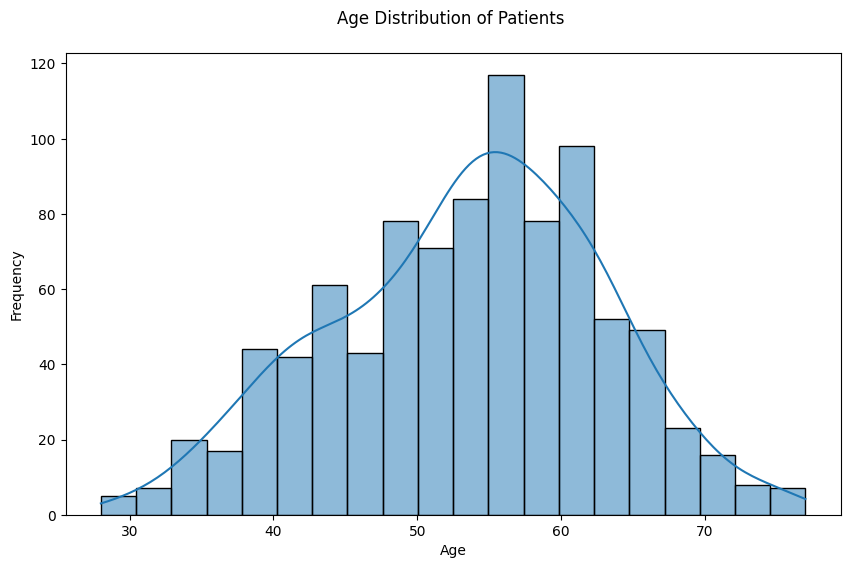

In [36]:
# Plotting the age distribution of the patients
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Patients \n')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [46]:
# Comparing the average cholesterol levels between patients with and without heart disease.

---


# 7. Outliers

<Axes: xlabel='chol'>

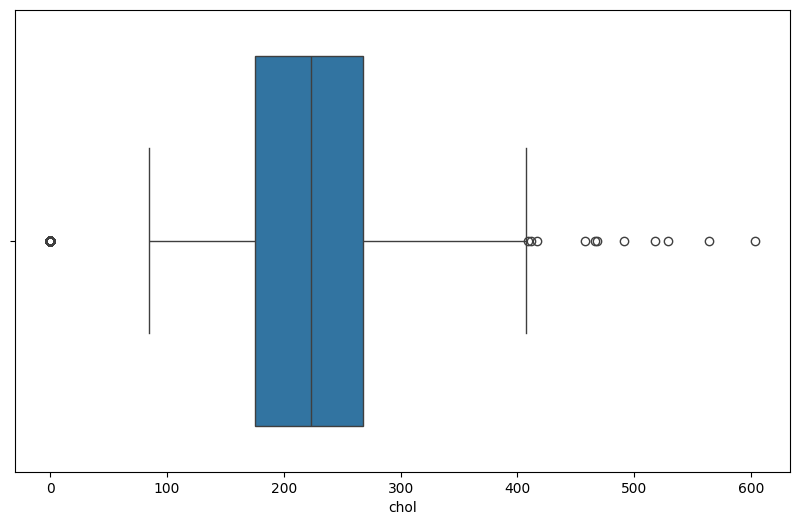

In [42]:
# Are there any outliers in cholesterol (chol) or resting blood pressure (trestbps)?
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['chol'])

<Axes: xlabel='trestbps'>

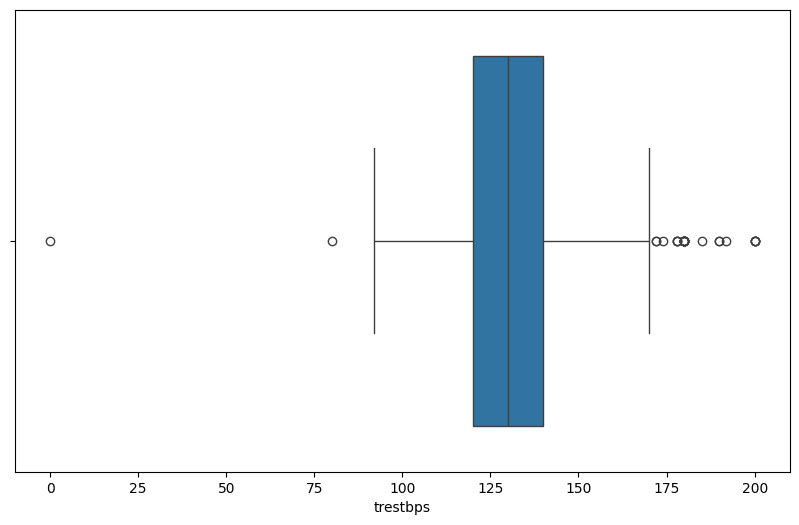

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['trestbps'])